In [7]:
import plotly.express as px

import pandas as pd
import numpy as np

In [23]:
gap_df = px.data.gapminder()
gap_df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [24]:
gap_df.describe()

,year,lifeExp,pop,gdpPercap,iso_num
count,1704.00000,1704.000000,1.704000e+03,1704.000000,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081,425.880282
std,17.26533,12.917107,1.061579e+08,9857.454543,248.305709
min,1952.00000,23.599000,6.001100e+04,241.165877,4.000000
25%,1965.75000,48.198000,2.793664e+06,1202.060309,208.000000
50%,1979.50000,60.712500,7.023596e+06,3531.846989,410.000000
75%,1993.25000,70.845500,1.958522e+07,9325.462346,638.000000
max,2007.00000,82.603000,1.318683e+09,113523.132900,894.000000


In [25]:
gap_df = gap_df.assign(gdp=gap_df['pop']*gap_df['gdpPercap'])

In [84]:
latest_year_df = gap_df[gap_df.year==max(gap_df.year)]

cont_df = latest_year_df.groupby('continent').agg({'gdp': 'sum'}).rename({'gdp': 'gdp'}, axis=1)
cont_df.reset_index(inplace=True)

country_df = latest_year_df.groupby('country').agg({'continent':'sum', 'pop':'sum', 'lifeExp':'mean', 'gdpPercap':'mean','gdp':'sum'})
country_df.reset_index(inplace=True)

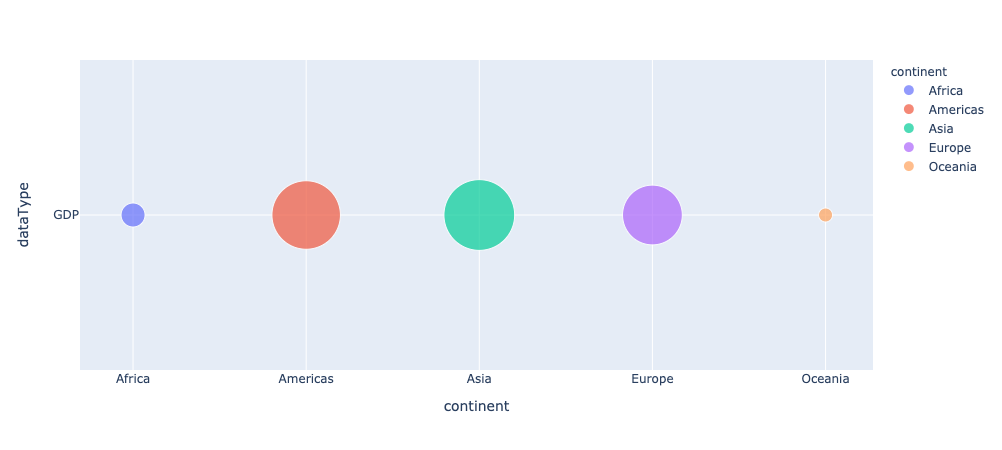

In [109]:
fig = px.scatter(cont_df.assign(dataType='GDP'), color='continent', x='continent', y='dataType', size='gdp', size_max=50)
fig.show()

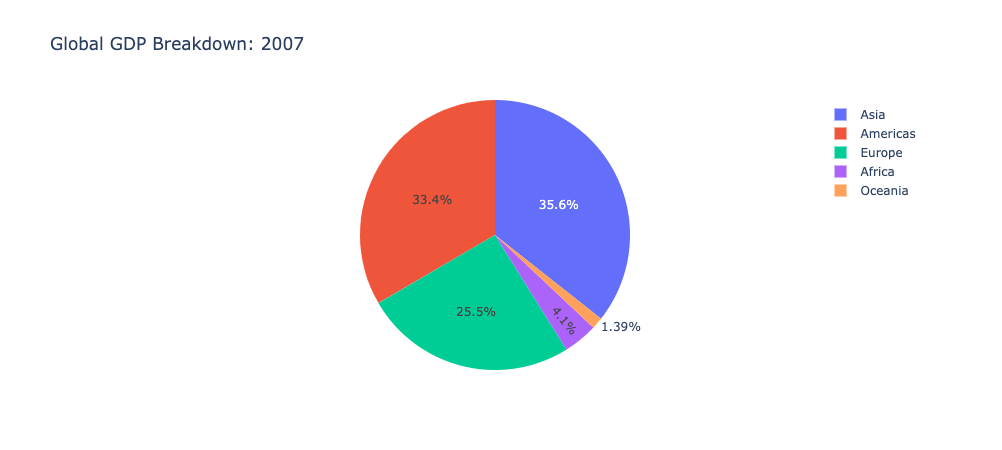

In [85]:
fig = px.pie(cont_df, values='gdp', names='continent', title='Global GDP Breakdown: 2007')
fig.show()

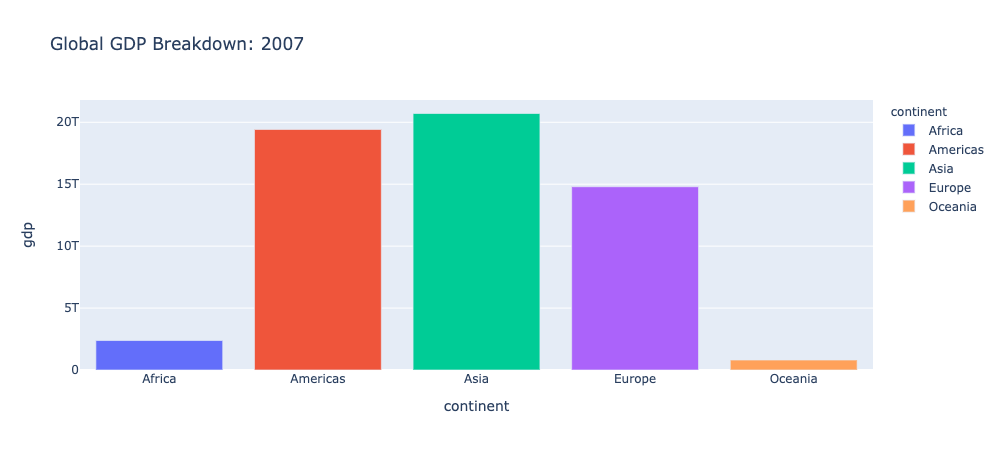

In [86]:
fig = px.bar(cont_df, color='continent', x='continent', y='gdp', title='Global GDP Breakdown: 2007')
fig.show()

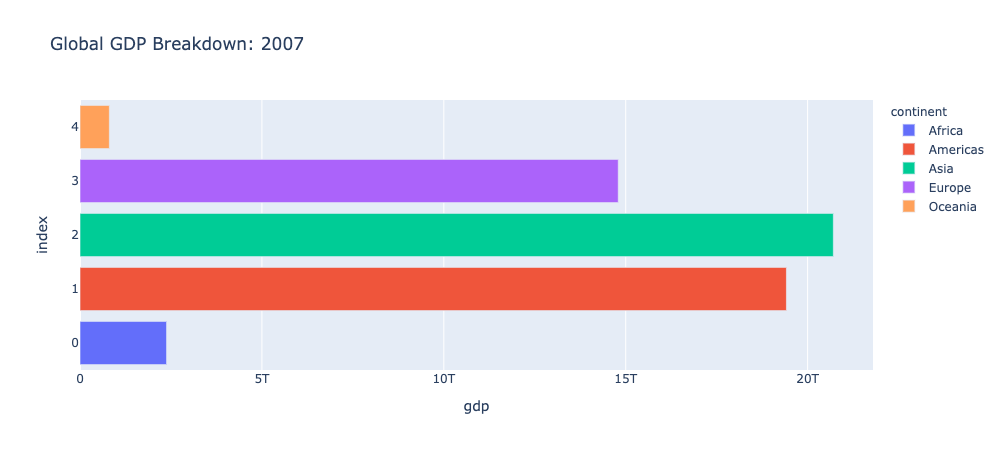

In [106]:
# horizontal bar (stacked)
fig = px.bar(cont_df, color='continent', x='gdp', orientation='h', title='Global GDP Breakdown: 2007')
fig.show()

In [96]:
country_df.columns

Index(['country', 'continent', 'pop', 'lifeExp', 'gdpPercap', 'gdp'], dtype='object')

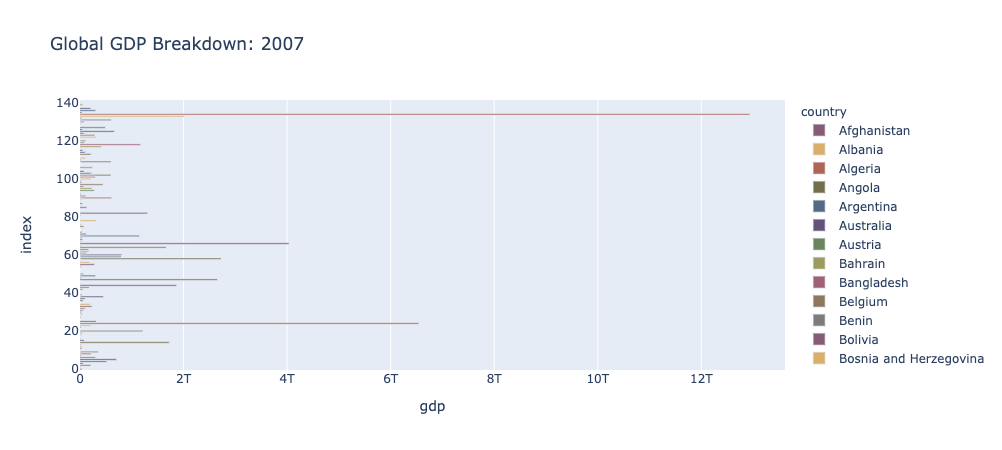

In [98]:
# horizontal bar (stacked)
fig = px.bar(country_df, color='country', x='gdp', orientation='h', title='Global GDP Breakdown: 2007', color_discrete_sequence=px.colors.qualitative.Antique)
fig.show()